# Rocket Altitude Control

- **Sample Goal:** Maintain the rocket close (within 1000m) of 30,000m altitude for as long as possible with the amount of fuel provided.
- **Alternate Goal:** Smooth landing (not implemented)

In [306]:
import matplotlib.pyplot as plt

Students fill this in:

(This could be a starting point, but I think starting from scratch or from `return 1` is also viable.)

In [325]:
def control_engine_power(time, altitude, upward_speed, fuel_amount):
    return 1

In [329]:
def control_engine_power(time, altitude, upward_speed, fuel_amount):
    if altitude < 20_000:
        return 1
    elif altitude < 30_000:
        return 0.8
    else:
        return 0.65

In [330]:
altitudes = [0]
upward_speeds = [0]
fuel_amounts = [1000]
engine_powers = [0]

timestep = 0.1 # second

while (altitudes[-1] > 0 or fuel_amounts[-1] > 0) and len(altitudes) < 50_000:
    altitude = altitudes[-1]
    upward_speed = upward_speeds[-1]
    fuel_amount = fuel_amounts[-1]
    
    engine_power = control_engine_power(len(altitudes)*timestep, altitude, upward_speed, fuel_amount)
    
    if not (0 <= engine_power <=1):
        raise ValueError("Engine power must be between zero and one")
        
    new_fuel_amount = fuel_amount - timestep * engine_power
    
    if new_fuel_amount <= 0:
        new_fuel_amount = 0
        engine_power = 0
    fuel_amounts.append(new_fuel_amount)
    engine_powers.append(engine_power)
        
    new_alt = altitude + timestep * upward_speed
    if new_alt < 0:
        new_alt = 0
    altitudes.append(new_alt)
    
    upward_speeds.append(upward_speed + timestep * (
        # acceleration from engine
        14*engine_power
        
        # gravity
        - 9.81
        
        # air drag
        # decrease coefficient to decrease stability increase difficulty :)
        - 0.005*upward_speed))

In [331]:
good_times = [alt for alt in altitudes if abs(30_000 - alt) < 1000]
print(f"Stayed within 3,000 m of 30,000 m for {len(good_times)*timestep:.1f} seconds.")

Stayed within 3,000 m of 30,000 m for 176.1 seconds.


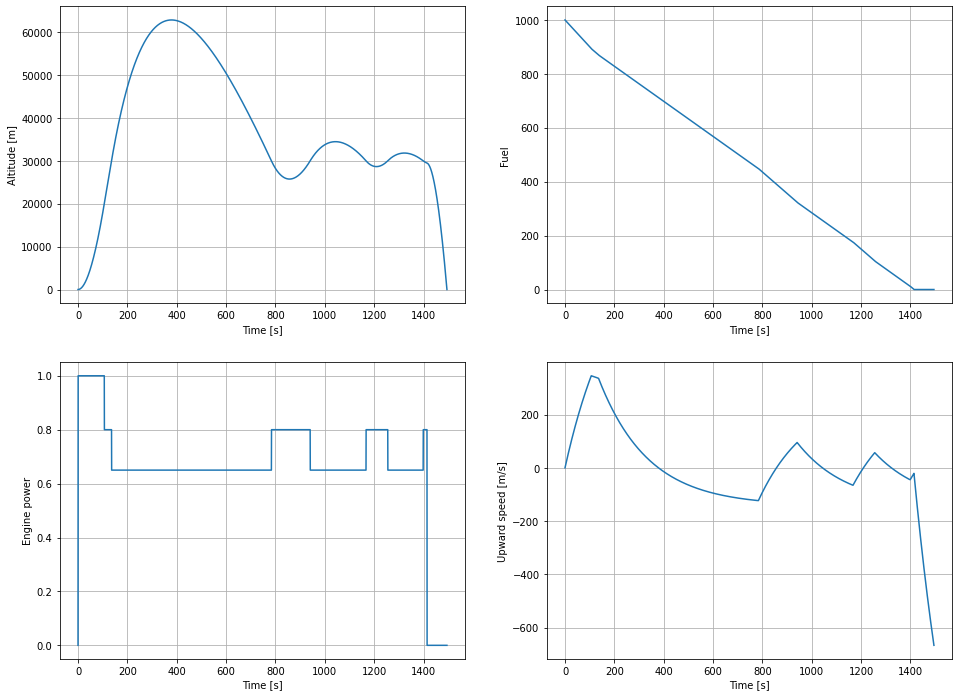

In [332]:
times = [i*timestep for i in range(len(altitudes))]

plt.figure(figsize=(8*2, 6*2))
plt.subplot(221)
plt.plot(times, altitudes)
plt.xlabel("Time [s]")
plt.ylabel("Altitude [m]")
plt.grid()

plt.subplot(222)
plt.plot(times, fuel_amounts)
plt.xlabel("Time [s]")
plt.ylabel("Fuel")
plt.grid()

plt.subplot(223)
plt.plot(times, engine_powers)
plt.xlabel("Time [s]")
plt.ylabel("Engine power")
plt.grid()

plt.subplot(224)
plt.plot(times, upward_speeds)
plt.xlabel("Time [s]")
plt.ylabel("Upward speed [m/s]")
plt.grid()